In [42]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from Chemometrics.basic import train_and_evaluate,pload, psave

%matplotlib inline

In [2]:
files = glob.glob("./data/data-20180102/**/*.cdf",recursive=True)

In [3]:
with open('C://Users//litao//Desktop//数据汇总.csv') as csv:
    df = pd.read_csv(csv,'\t')
names = df['样品名称']
not_commonpattern = names != '共有模式'
df = df[not_commonpattern]
df.dropna('columns',how='all',inplace=True)
df.fillna(0,inplace=True)

In [4]:
observations = df.loc[:,'1':]
labels = df['分类编号']

In [44]:
YHdata = {'observations': observations,'labels':labels}
psave(YHdata,'YHdata.p')

In [5]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [8]:
sk = StratifiedKFold(n_splits=10,shuffle=True)
clf = KNeighborsClassifier()

In [9]:
params = {'n_neighbors':range(3,9)}

In [10]:
estimator = GridSearchCV(clf,param_grid=params)

In [11]:
estimator.fit(observations,labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(3, 9)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [12]:
preds = estimator.predict(observations)

In [13]:
import re
fh1 = lambda x: re.search('[^-]*',x).group()

In [14]:
label_string = df['分类名称'].map(fh1)

In [25]:
import numpy as np

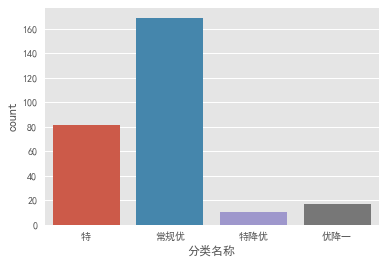

In [17]:
sns.countplot(label_string)

test set mean accuracy is 82.6086956521739%


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

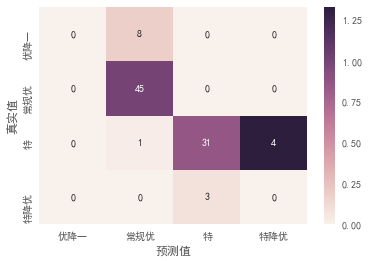

In [29]:
train_and_evaluate(observations,label_string)

In [16]:
import seaborn as sns

In [18]:
plt.rcParams['font.sans-serif']

['SimHei']

In [19]:
from collections import Counter

In [21]:
from sklearn.decomposition import PCA

In [22]:
score = PCA(n_components=2).fit_transform(observations)

In [23]:
from Chemometrics.basic import scatter

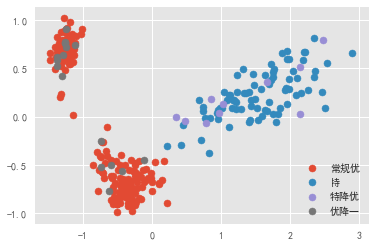

In [24]:
scatter(score[:,0],score[:,1],label_string)

In [31]:
from collections import Counter

In [32]:
Counter(label_string)

Counter({'优降一': 17, '常规优': 169, '特': 81, '特降优': 10})

In [39]:
label2 =label_string[label_string.isin(['常规优','优降一'])]
ob2 = observations.loc[label2.index]

test set mean accuracy is 91.93548387096774%


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

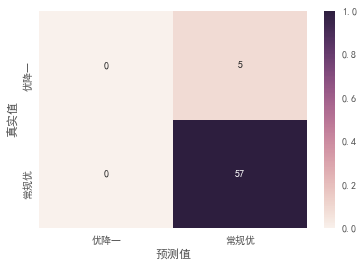

In [41]:
train_and_evaluate(ob2,label2)